In [13]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
import os 

In [15]:
#just to check we are in the right cwd. 
cwd = os.getcwd() 
print(cwd)

/Users/Ismael/igoogle-drive/code/lensing/WeakLensingDeblending/mynotebooks/paper


## Run setup scripts

In [17]:
#run setup scripts / reload setup scripts 
%run preamble.py
%run errors.py

In [18]:
files

{'final_fitsLSST1': '/Users/Ismael/aegis/WeakLensingDeblending/projectLSST-g1_-100-g2_0/final_fits.fits',
 'final_fitsLSST2': '/Users/Ismael/aegis/WeakLensingDeblending/projectLSST-g1_-50-g2_0/final_fits.fits',
 'final_fitsLSST3': '/Users/Ismael/aegis/WeakLensingDeblending/projectLSST-g1_-20-g2_0/final_fits.fits',
 'final_fitsLSST4': '/Users/Ismael/aegis/WeakLensingDeblending/projectLSST-g1_-15-g2_0/final_fits.fits',
 'final_fitsLSST5': '/Users/Ismael/aegis/WeakLensingDeblending/projectLSST-g1_-10-g2_0/final_fits.fits',
 'final_fitsLSST6': '/Users/Ismael/aegis/WeakLensingDeblending/projectLSST-g1_-5-g2_0/final_fits.fits',
 'final_fitsLSST7': '/Users/Ismael/aegis/WeakLensingDeblending/projectLSST-g1_0-g2_0/final_fits.fits',
 'final_fitsLSST8': '/Users/Ismael/aegis/WeakLensingDeblending/projectLSST-g1_5-g2_0/final_fits.fits',
 'final_fitsLSST9': '/Users/Ismael/aegis/WeakLensingDeblending/projectLSST-g1_10-g2_0/final_fits.fits',
 'final_fitsLSST10': '/Users/Ismael/aegis/WeakLensingDeblend

In [19]:
#select only the original ones
old_file_names = ['final_fitsLSST3', 'final_fitsLSST4', 'final_fitsLSST5', 'final_fitsLSST6', 'final_fitsLSST7', 'final_fitsLSST8', 'final_fitsLSST9', 'final_fitsLSST10', 'final_fitsLSST11']

## Read and filter out duplicated and bad objects.

In [20]:
#this new LSST set of catalogues has g1 = .02 , g2 = 0.0 ; we will be using this one from now on. 
#this filtering excludes object that are duplicated and whose snr_grp are problematic.

In [21]:
#in the order that corresponds to the catalogues. 
g1s = [-.1, -.05, -.02,-.015,-.01,-.005,0.,.005,.01,.015,.02, .05, .1]

### Include new shears. 

In [ ]:
#this only excludes object that are duplicated and whose snr_grp are problematic.
main_catsLSST = []  
for key in files:
    results = fits.open(files[key])
    main_catsLSST.append(not_bad(get_non_duplicated_cat(Table.read(results,hdu=1)))) #assume not many objects are duplicated/bad.
    print('reading {}'.format(key))

### Include only old shears. 

In [9]:
g1s_old = g1s[2:-2] #select good ol shears. 

In [ ]:
main_catsLSST = []  
for key in old_files_names:
    results = fits.open(files[key])
    main_catsLSST.append(not_bad(get_non_duplicated_cat(Table.read(results,hdu=1)))) #assume not many objects are duplicated/bad.
    print('reading {}'.format(key))

## Plot 

In [8]:
#produce different plots with the biases calculated from the fisher formalism. 
plt.rc('text', usetex=True)
#matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


def purity_snr_scatter_final(fraction,analyze_cat,colors,power,full_cat,ax,name,save=None):
    #divide into 4 groups 

    high_pur_high_snr = up_cut(up_cut(analyze_cat,'purity',.98),'snr_grpf',6)
    high_pur_low_snr = down_cut(up_cut(analyze_cat,'purity',.98),'snr_grpf',6)
    low_pur_high_snr = up_cut(down_cut(analyze_cat,'purity',.98),'snr_grpf',6)
    low_pur_low_snr = down_cut(down_cut(analyze_cat,'purity',.98),'snr_grpf',6)
    
    #calculate percentages 
    p1 = float(len(high_pur_high_snr))/len(analyze_cat)
    p2 = float(len(high_pur_low_snr))/len(analyze_cat)
    p3 = float(len(low_pur_high_snr))/len(analyze_cat)
    p4 = float(len(low_pur_low_snr))/len(analyze_cat)
    
    #create smaller catalogues to plot them and reduce the density of points in each region. 
    small_hphs = small(high_pur_high_snr,int(len(high_pur_high_snr)* fraction))
    small_hpls = small(high_pur_low_snr,int(len(high_pur_low_snr)* fraction))
    small_lphs = small(low_pur_high_snr,int(len(low_pur_high_snr) * fraction))
    small_lpls = small(low_pur_low_snr,int(len(low_pur_low_snr)* fraction))

    x_new_ticks = [6,12,18,24,30]
    tex_x_new_ticks = [r'$6$',r'$12$',r'$18$',r'$24$',r'$30$']

    y_orig_ticks = np.array([0.,0.142,0.5402,.785,1])
    y_new_ticks = []
    for label in y_orig_ticks: 
        y_new_ticks.append(r'${:.2g}$'.format(label**(1./12)))
    
    #plot each group separately with different colors 
    #replace original ticks with of new ones. Do that for all. 
    plt.scatter(small_hphs['snr_grpf'],small_hphs['purity']**(power),alpha=.2,color=colors[0])
    plt.yticks(y_orig_ticks, y_new_ticks)
    plt.xticks(x_new_ticks, tex_x_new_ticks)
    
    plt.scatter(small_hpls['snr_grpf'],small_hpls['purity']**(power),alpha=.2,color=colors[1])
    plt.yticks(y_orig_ticks, y_new_ticks)
    plt.xticks(x_new_ticks, tex_x_new_ticks)

    plt.scatter(small_lphs['snr_grpf'],small_lphs['purity']**(power),alpha=.2,color=colors[2])
    plt.yticks(y_orig_ticks, y_new_ticks)
    plt.xticks(x_new_ticks, tex_x_new_ticks)
    
    plt.scatter(small_lpls['snr_grpf'],small_lpls['purity']**(power),alpha=.2,color=colors[3])
    plt.yticks(y_orig_ticks, y_new_ticks)
    plt.xticks(x_new_ticks, tex_x_new_ticks)

    #annotate with colors the percentages
    plt.annotate("{0:.1f}\%".format(p1*100), xy=(0.540, 0.885), xycoords='axes fraction',color='black',fontsize=30)
    plt.annotate("{0:.1f}\%".format(p2*100), xy=(0.040, 0.885), xycoords='axes fraction',color='black',fontsize=30)
    plt.annotate("{0:.1f}\%".format(p3*100), xy=(0.540, 0.4), xycoords='axes fraction',color='black',fontsize=30)
    plt.annotate("{0:.1f}\%".format(p4*100), xy=(0.040, 0.4), xycoords='axes fraction',color='black',fontsize=30)
    plt.text(.380,.01,r'Fraction of full catalogue:${0:.1f}$\%'.format(float(len((analyze_cat)))/len(full_cat)*100),transform=ax.transAxes,fontsize=25)
    
    

    plt.xlabel(r'$\nu_{\rm grpf}$',fontsize=40)
    plt.ylabel(r'$\rho$',fontsize=40)
    plt.tick_params(axis='x', which='major',labelsize=25,size=10,width=3)
    plt.tick_params(axis='y', which='major',labelsize=25,size=10,width=3)
    plt.xlim(0,30)
    plt.ylim(0.,1.)
    #plt.title(name)



 

In [53]:
scatter_cat = main_catsLSST[4]

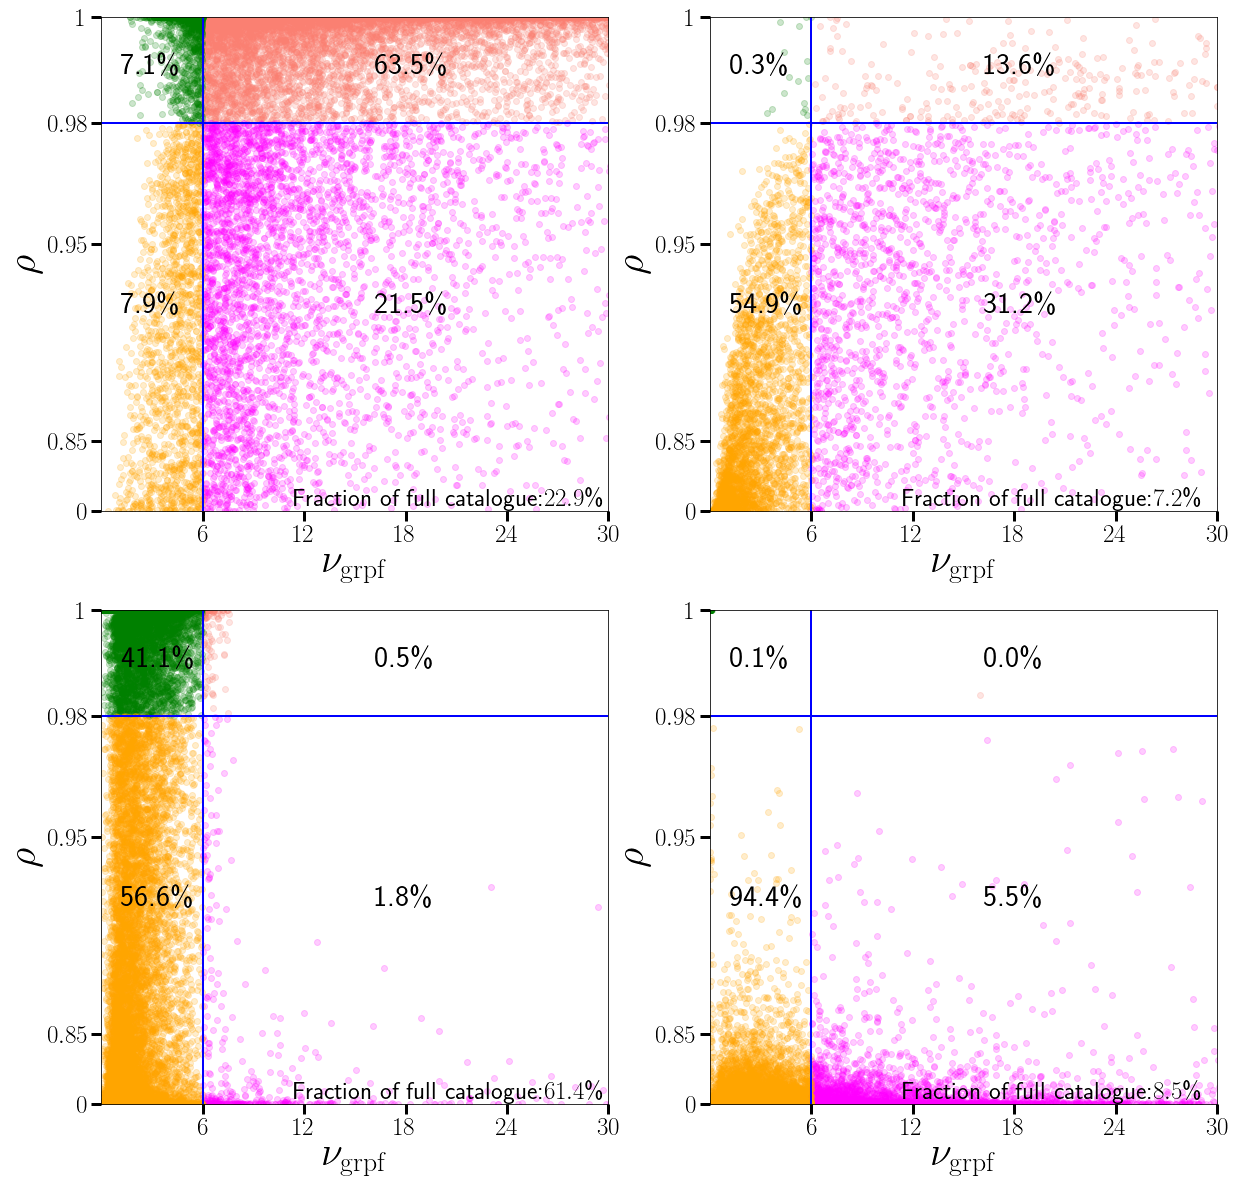

In [54]:
fig = plt.figure(figsize=(20,20))
nrow,ncol = 2,2
power = 12. 

cats =[detc_and_notambig(scatter_cat),detc_and_ambig(scatter_cat),notdetc_and_notambig(scatter_cat),notdetc_and_ambig(scatter_cat)]
names = ['detc_and_notambig','detc_and_ambig','notdetc_and_notambig','notdetc_and_ambig']
colors= ['salmon', 'green', 'magenta', 'orange','black']
fractions = [1/10.,1./10, 1./20, 1.] #exclusively for plotting purposes

for i,(name,temp_cat,fraction) in enumerate(zip(names,cats,fractions)):
    ax = plt.subplot(nrow, ncol, i+1)
    plt.axhline(.98**power,color='blue',linewidth=2)
    plt.axvline(6,color='blue',linewidth=2)
    purity_snr_scatter_final(fraction, temp_cat,colors,power,scatter_cat,ax,name)
    #as reference for debugging, 

plt.xlim(0,30)
fig.savefig('/Users/Ismael/Desktop/scatter_cat.png')

In [48]:
lensing_sample = good(main_catsLSST[4])
print 'number of galaxies in lensing sample that are detected: {}'.format(float(len(detected(lensing_sample)))/len(lensing_sample))


number of galaxies in lensing sample that are detected: 0.928347837381


In [11]:
scatter_cat = main_catsLSST[0]

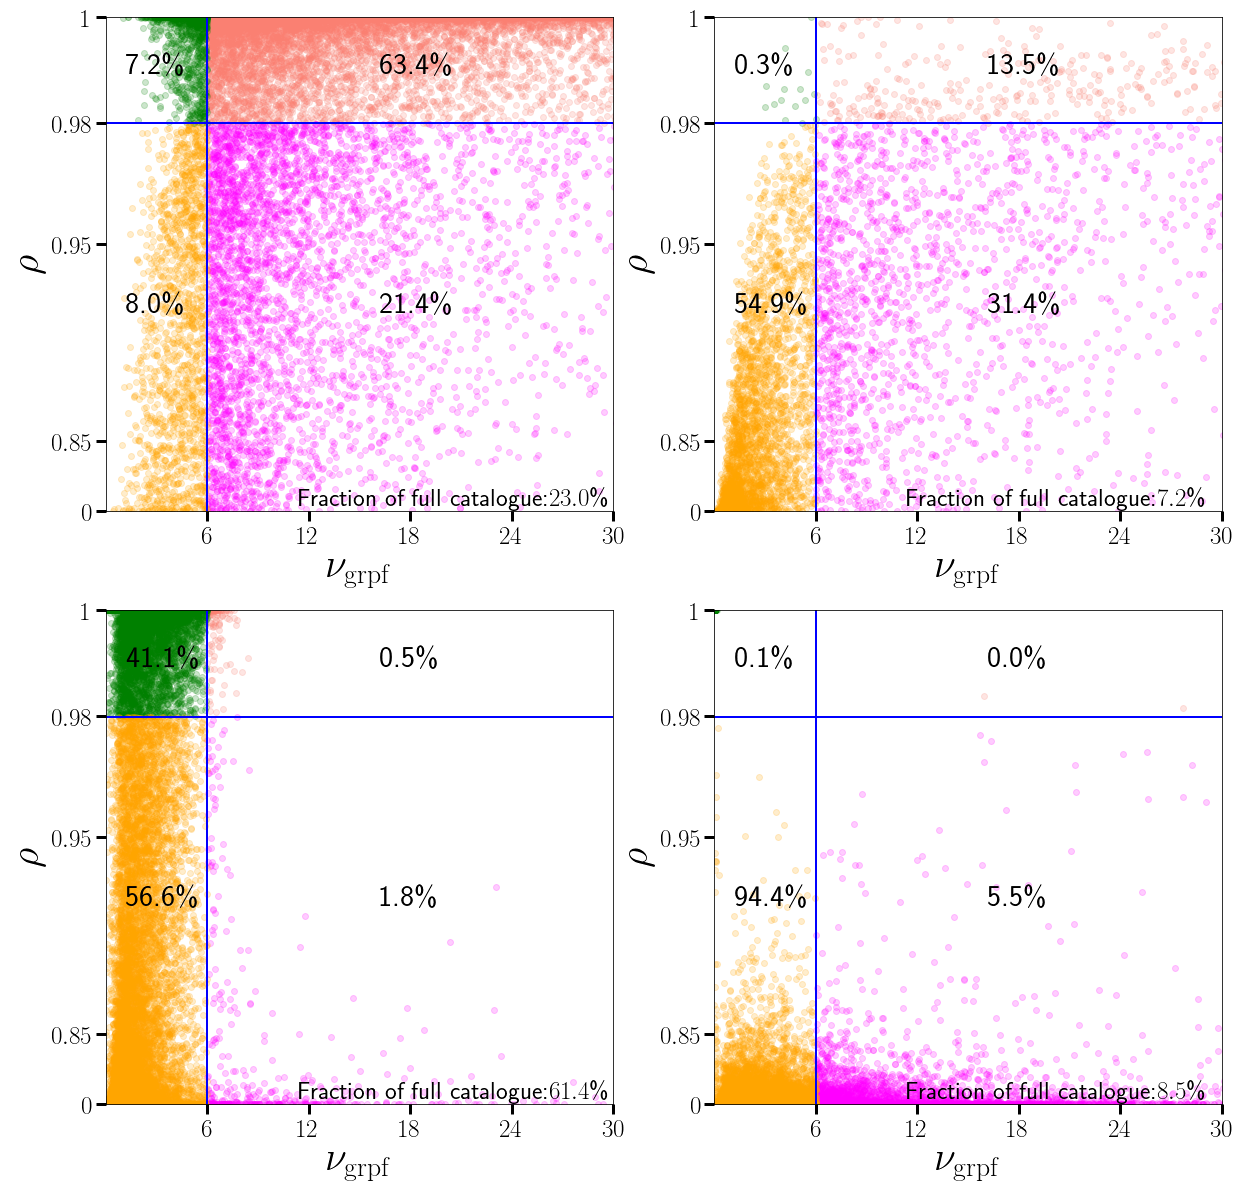

In [12]:
fig = plt.figure(figsize=(20,20))
nrow,ncol = 2,2
power = 12. 

cats =[detc_and_notambig(scatter_cat),detc_and_ambig(scatter_cat),notdetc_and_notambig(scatter_cat),notdetc_and_ambig(scatter_cat)]
names = ['detc_and_notambig','detc_and_ambig','notdetc_and_notambig','notdetc_and_ambig']
colors= ['salmon', 'green', 'magenta', 'orange','black']
fractions = [1/10.,1./10, 1./20, 1.] #exclusively for plotting purposes

for i,(name,temp_cat,fraction) in enumerate(zip(names,cats,fractions)):
    ax = plt.subplot(nrow, ncol, i+1)
    plt.axhline(.98**power,color='blue',linewidth=2)
    plt.axvline(6,color='blue',linewidth=2)
    purity_snr_scatter_final(fraction, temp_cat,colors,power,scatter_cat,ax,name)
    #as reference for debugging, 

plt.xlim(0,30)
fig.savefig('/Users/Ismael/Desktop/scatter_cat.png')